In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
train = pd.read_csv(r"E:\Mentorship\Datasets\train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train.shape

(10886, 12)

In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
train.isnull().count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
x = train.drop(['datetime','casual', 'count'], axis=1)


In [10]:
corr_matrix = x.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x.drop(to_drop, axis=1, inplace=True)
corr_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered
season,1.000000,0.029368,0.008126,0.008879,0.258689,0.264744,0.190610,0.147121,0.164011
holiday,0.029368,1.000000,0.250491,0.007074,0.000295,0.005215,0.001929,0.008409,0.020956
workingday,0.008126,0.250491,1.000000,0.033772,0.029966,0.024660,0.010880,0.013373,0.119460
weather,0.008879,0.007074,0.033772,1.000000,0.055035,0.055376,0.406244,0.007261,0.109340
temp,0.258689,0.000295,0.029966,0.055035,1.000000,0.984948,0.064949,0.017852,0.318571
atemp,0.264744,0.005215,0.024660,0.055376,0.984948,1.000000,0.043536,0.057473,0.314635
humidity,0.190610,0.001929,0.010880,0.406244,0.064949,0.043536,1.000000,0.318607,0.265458
windspeed,0.147121,0.008409,0.013373,0.007261,0.017852,0.057473,0.318607,1.000000,0.091052
registered,0.164011,0.020956,0.119460,0.109340,0.318571,0.314635,0.265458,0.091052,1.000000


In [11]:
x['temp'] = ((x['temp'] - x['temp'].mean())/(max(x['temp']) - min(x['temp'])))
x['windspeed'] = ((x['windspeed'] - min(x['windspeed']))/(max(x['windspeed']) - min(x['windspeed'])))


In [12]:
y = train['count']
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [15]:
xprediction = lr.predict(xtest)
xprediction

array([240.02791427, 238.15940541, 240.92955268, ..., 442.75777052,
       307.84232103,   9.5247888 ])

In [16]:
lr.predict([[1, 0, 0, 1, -0.258608, 81, 0.000000, 13]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.22680583])

In [17]:
from sklearn.metrics import r2_score

r2_score(ytest, xprediction)

0.9651924711336769

Text(0.5, 1.0, 'Actual vs. predicted')

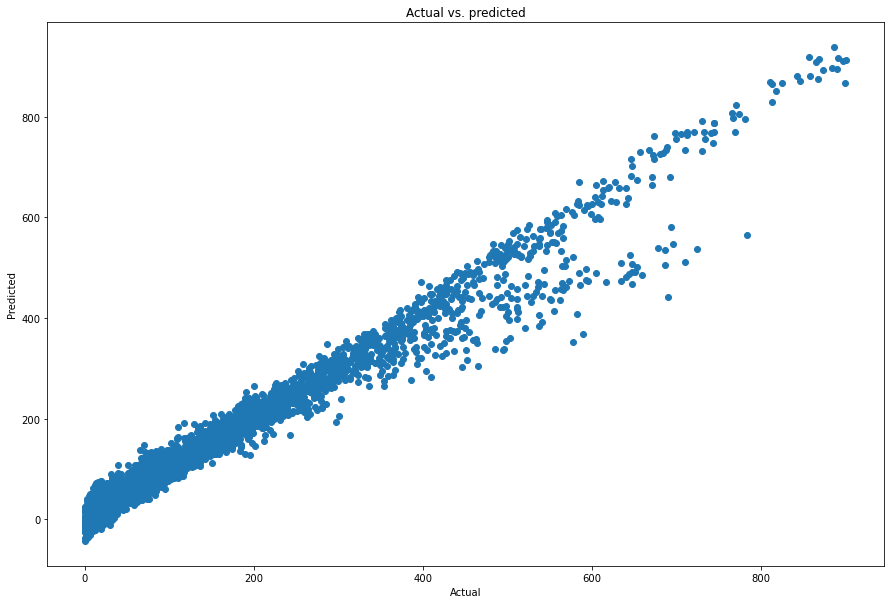

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, xprediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. predicted')

In [18]:
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,0.008126,0.008879,0.258689,0.264744,0.190610,0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,0.250491,0.007074,0.000295,0.005215,0.001929,0.008409,0.043799,0.020956,0.005393
workingday,0.008126,0.250491,1.000000,0.033772,0.029966,0.024660,0.010880,0.013373,0.319111,0.119460,0.011594
weather,0.008879,0.007074,0.033772,1.000000,0.055035,0.055376,0.406244,0.007261,0.135918,0.109340,0.128655
temp,0.258689,0.000295,0.029966,0.055035,1.000000,0.984948,0.064949,0.017852,0.467097,0.318571,0.394454
atemp,0.264744,0.005215,0.024660,0.055376,0.984948,1.000000,0.043536,0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,0.010880,0.406244,0.064949,0.043536,1.000000,0.318607,0.348187,0.265458,0.317371
windspeed,0.147121,0.008409,0.013373,0.007261,0.017852,0.057473,0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,0.319111,0.135918,0.467097,0.462067,0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,0.020956,0.119460,0.109340,0.318571,0.314635,0.265458,0.091052,0.497250,1.000000,0.970948
